# HadUK Data

The HadUK datasets use NetCDF files which cannot be opened and read like text files and therefore require the use of additional python libraries to open and use the data. The following is a replica of the instructions written by Iarla Boyce on his GitHub (including code):

Installing required libraries

In [4]:
!conda install -c conda-forge netcdf4 -y
!conda install -c conda-forge xarray dask -y
print('hi')
import xarray as xr
import netCDF4 as nc
import dask

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - netcdf4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.21.5               |       hafa3907_1          46 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    cftime-1.6.4               |  py312h3a11e2b_1         203 KB  conda-forge
    conda-24.9.1               |  py312hb401068_0         1.1 MB  conda-forge
    gettext-0.22.5             |       hdfe23c8_3         469 KB  conda-forge
    gettext-tools-0.22.5       |       hdfe23c8_3         2.4 MB  conda-forge
    h5py-3.11.0                |nompi_py312hfc94b0

Opening data:

In [30]:
#Opening a single netCDF file
data = xr.open_dataset(r"/Users/manchesterarndale/Library/Mobile Documents/com~apple~CloudDocs/12km/tas/mon/v20240514/tas_hadukgrid_uk_12km_mon_188401-188412.nc")

#Opening all the netCDF files in a directory and merging them into one variable - must use /*.cd after folder name to extract all netCDF files in folder.
data_temp = xr.open_mfdataset(r"/Users/manchesterarndale/Library/Mobile Documents/com~apple~CloudDocs/12km/tas/mon/v20240514/*.nc", parallel=False) #Always set parallel to False when using open_mfdataset. There is a bug in the package.

The following commands allow user to view: the variables in the dataset, the dimensions, attributes, and data (Iarla Boyce's code).

In [31]:
#prints all the variables listed in the .nc file
print(data.data_vars)

Data variables:
    tas                           (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...


In [32]:
#prints all the dimensions listed in the .nc file
print(data.dims)

Frozen({'time': 12, 'projection_y_coordinate': 112, 'projection_x_coordinate': 82, 'bnds': 2})


In [33]:
#prints all the attributes listed in the .nc file
print(data.attrs)

{'comment': 'Monthly resolution gridded climate observations', 'creation_date': '2024-05-17T09:46:45', 'frequency': 'mon', 'institution': 'Met Office', 'references': 'doi: 10.1002/gdj3.78', 'short_name': 'monthly_meantemp', 'source': 'HadUK-Grid_v1.3.0.0', 'title': 'Gridded surface climate observations data for the UK', 'version': 'v20240514', 'Conventions': 'CF-1.7'}


In [34]:
#prints the data of the variable
print(data.tas)

<xarray.DataArray 'tas' (time: 12, projection_y_coordinate: 112,
                         projection_x_coordinate: 82)>
[110208 values with dtype=float64]
Coordinates:
  * time                     (time) datetime64[ns] 1884-01-16 ... 1884-12-16
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number             (time) int64 ...
    season_year              (time) int64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Mean air temperature
    units:          degC
    description:    Mean air temperature
    label_units:    °C
    level:          1.5m
    plot_label:     Mean air temperature at 1.5m (°C)
    cell_methods:   time: mid_range within days time: mean o

The majority of the data are NaN values (not a number) which has previously posed problems with preserving accurate spatial resoution:

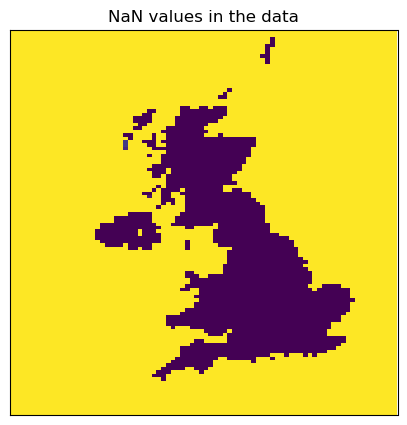

In [38]:
import matplotlib.pyplot as plt

temperature_data = data_temp['tas']

plt.figure(figsize=(5, 5))
ax = temperature_data.isnull().sum(dim='time').plot(add_colorbar=False)
plt.title('NaN values in the data')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

To create 2D plots of the data:

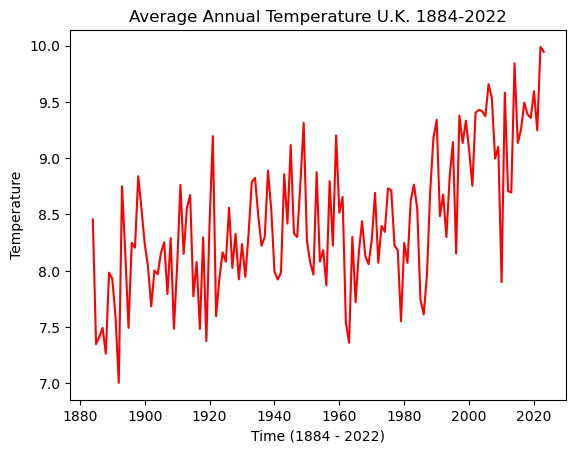

In [47]:
from skimage.measure import block_reduce
import numpy as np

#variables can be converted to numpy arrays
data_one_year = data.tas.values
data_all_months = data_temp.tas.values

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
temp = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
temp_mean = np.nanmean(temp, axis=(1, 2))

time = np.arange(1884,2024)

plt.plot(time, temp_mean, 'r')
plt.xlabel('Time (1884 - 2022)')
plt.ylabel('Temperature')
plt.title('Average Annual Temperature U.K. 1884-2022')
plt.rcParams.update({'font.size': 12})

To visualise the data over a map of the UK using cartopy:

Error while loading conda entry point: conda-libmamba-solver (dlopen(/opt/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.20.dylib
  Referenced from: <649CC611-6E3C-3C73-B5F2-9D8AD3C09263> /opt/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/opt/anaconda3/lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/usr/local/lib/libarchive.20.dylib' (no such file), '/usr/lib/libarchive.20.dylib' (no such file, not in dyld cache))
done
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be d

/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


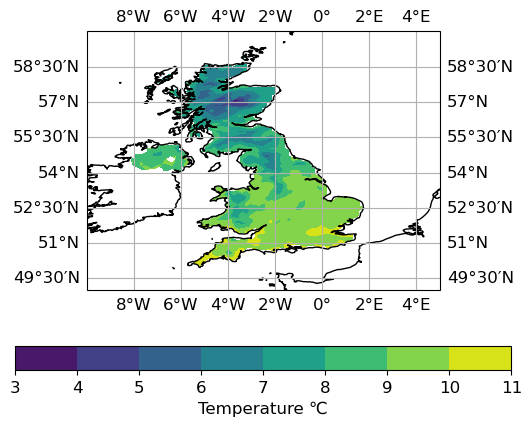

In [51]:
!conda install -c conda-forge cartopy -y
import os
os.environ['CARTOPY_USER_BACKEND'] = 'memory'

import cartopy.crs as ccrs

#netcdf file contains the latitude and longitude values of the data but they are not within the actual data array.
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]

mean_temp = np.mean(data_all_months, axis=0) #mean temperature calculated over time dimension

plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())#create cartopy projection

ax.set_extent([-10, 5, 49, 60]) #setting map boundaries with latitude and longitude

ax.coastlines(resolution='10m', color='black') #adding coastlines and gridlines, predefined in cartopy

ax.gridlines(draw_labels=True, dms=True)

contour = plt.contourf(lons, lats, mean_temp, cmap=plt.cm.viridis) #contour plot for mean temperature field

cbar = plt.colorbar(contour, orientation='horizontal') #colourbar
cbar.set_label(u"Temperature \u2103")

plt.show()

In [73]:
print("temp_mean shape:", temp_mean.shape)
print("temp_mean size:", temp_mean.size)
print("lons shape:", lons.shape)
print("lons size:", lons.size)
print("lats shape:", lats.shape)
print("lats size:", lats.size)
print("data['tas'] shape:", data['tas'].shape)


temp_mean shape: (140,)
temp_mean size: 140
lons shape: (112, 82)
lons size: 9184
lats shape: (112, 82)
lats size: 9184
data['tas'] shape: (12, 112, 82)


/var/folders/y0/gd371z2j1tg26_6qygckfj2w0000gn/T/ipykernel_46562/2110336438.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_grid, lat_grid, mean_temp, cmap='viridis', shading='auto')


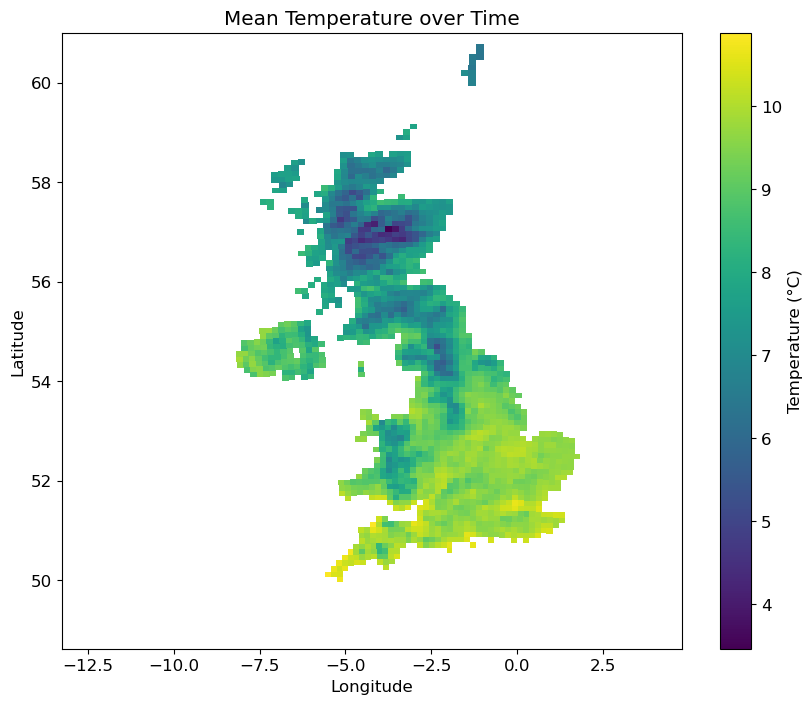

In [91]:
plt.figure(figsize=(10, 8))

plt.pcolormesh(lon_grid, lat_grid, mean_temp, cmap='viridis', shading='auto')

cbar = plt.colorbar()
cbar.set_label("Temperature (°C)")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Temperature over Time')

plt.show()


In [89]:
data_groundfrost = xr.open_mfdataset(r"/Users/manchesterarndale/Library/Mobile Documents/com~apple~CloudDocs/12km/groundfrost/mon/v20240514/*.nc", parallel=False)

/var/folders/y0/gd371z2j1tg26_6qygckfj2w0000gn/T/ipykernel_46562/215103582.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon_grid, lat_grid, mean_gf, cmap='viridis', shading='auto')


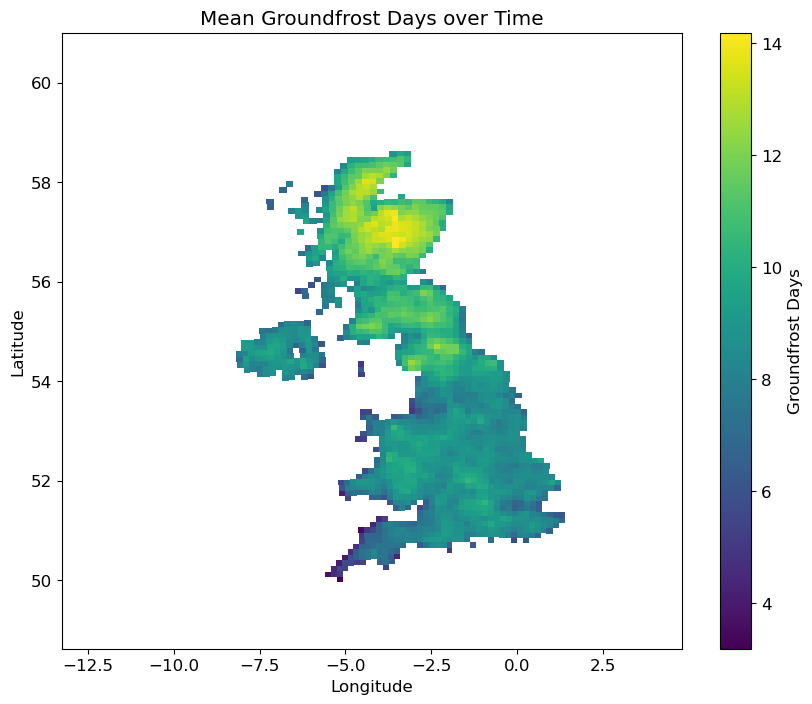

In [95]:
gf_all_months = data_groundfrost.groundfrost.values
mean_gf = np.mean(gf_all_months, axis=0)

plt.figure(figsize=(10, 8))

plt.pcolormesh(lon_grid, lat_grid, mean_gf, cmap='viridis', shading='auto')

cbar = plt.colorbar()
cbar.set_label("Groundfrost Days")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Groundfrost Days over Time')

plt.show()